In [127]:
import networkx as nx
from networkx.algorithms import community as com
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import powerlaw as pl
from collections import Counter
from operator import itemgetter
import scipy.stats as stats

In [128]:
#%run StatisticalDataAnalysis.ipynb

In [129]:
#subDF = pd.DataFrame(data=subDict)

#with open("data/subredditsData", "wb+") as file:
#    pickle.dump(subDF, file)

In [130]:
#usersDF = pd.DataFrame(data=usersDict)

#with open("data/usersData", "wb+") as file:
#    pickle.dump(usersDF, file)

In [131]:
#submissionsDF = pd.DataFrame(data=submissionDict)

#with open("data/submissionsData", "wb+") as file:
#    pickle.dump(submissionsDF, file)

In [132]:
with open("data/subredditsData", 'rb') as file:
    subDF = pickle.load(file)

In [133]:
with open("data/usersData", 'rb') as file:
    usersDF = pickle.load(file)

In [134]:
#with open("data/submissionsData", 'rb') as file:
#    submissionsDF = pickle.load(file)

In [135]:
for index in subDF:
    subDF[index]['users'] = list(filter(lambda a: a != '[deleted]', subDF[index]['users']))

In [136]:
subreddits = set()
for _, item in subDF.iteritems():
    subreddits.add(item['subreddit'])

In [137]:
SNet = nx.Graph()
SNet.add_nodes_from(subreddits)

In [138]:
for _, item in usersDF.iteritems():
    if len(item['subreddit_ids']) > 1:
        for i in range(0, len(item['subreddit_ids']) - 1):
            for j in range(i + 1, len(item['subreddit_ids'])):
                if (subDF[item['subreddit_ids'][i]]['subreddit'], subDF[item['subreddit_ids'][j]]['subreddit']) in SNet.edges:
                    SNet.edges[subDF[item['subreddit_ids'][i]]['subreddit'], subDF[item['subreddit_ids'][j]]['subreddit']]['weight'] += 1
                else:
                    SNet.add_edge(subDF[item['subreddit_ids'][i]]['subreddit'], subDF[item['subreddit_ids'][j]]['subreddit'], weight=1)

In [139]:
#print(usersDF.iat[2, 1])

In [140]:
#for _, item in usersDF.iteritems():
#    print(item['subreddit_ids'])

In [141]:
outputPath = "models/SNet_count_aggregation.gml"

nx.write_gml(SNet, outputPath)

In [142]:
SNetTSubreddits = ['reddit.com', 'pics', 'worldnews', 'programming', 'business', 'politics', 'obama', 'science',
                   'technology', 'WTF', 'AskReddit', 'netsec', 'philosophy', 'videos', 'offbeat', 'funny', 'entertainment',
                   'linux', 'geek', 'gaming', 'comics', 'gadgets', 'nsfw', 'news', 'environment', 'atheism', 'canada',
                   'math', 'Economics', 'scifi', 'bestof', 'cogsci', 'joel', 'Health', 'guns', 'photography', 'software',
                   'history', 'ideas']

In [143]:
#for id, item in subDF.items():
#    print(item['subreddit'])

In [144]:
SNetT = nx.Graph()
SNetT.add_nodes_from(SNetTSubreddits)

In [145]:
for _, item in usersDF.iteritems():
    if len(item['subreddit_ids']) > 1:
        for i in range(0, len(item['subreddit_ids']) - 1):
            for j in range(i + 1, len(item['subreddit_ids'])):
                if subDF[item['subreddit_ids'][i]]['subreddit'] in SNetTSubreddits and subDF[item['subreddit_ids'][j]]['subreddit'] in SNetTSubreddits:
                    if (subDF[item['subreddit_ids'][i]]['subreddit'], subDF[item['subreddit_ids'][j]]['subreddit']) in SNetT.edges:
                        SNetT.edges[subDF[item['subreddit_ids'][i]]['subreddit'], subDF[item['subreddit_ids'][j]]['subreddit']]['weight'] += 1
                    else:
                        SNetT.add_edge(subDF[item['subreddit_ids'][i]]['subreddit'], subDF[item['subreddit_ids'][j]]['subreddit'], weight=1)

In [146]:
outputPath = "models/SNetT_count_aggregation.gml"

nx.write_gml(SNetT, outputPath)

In [147]:
SNetClean = SNet
weightToCut = 4

edgesToCut = list(edge[:2] for edge in list(filter(lambda edge: edge[2] < weightToCut, (e for e in SNetClean.edges.data('weight')))))
SNetClean.remove_edges_from(edgesToCut)

SNetClean.remove_nodes_from(list(nx.isolates(SNetClean)))

In [148]:
outputPath = "models/SNet_count_aggregation_clean.gml"

nx.write_gml(SNetClean, outputPath)

In [149]:
#inputPath = "models/SNet_count_aggregation.gml"
#SNet = nx.Graph(nx.read_gml(inputPath))

#inputPath = "models/SNetT_count_aggregation.gml"
#SNetT = nx.Graph(nx.read_gml(inputPath))

#inputPath = "models/SNet_count_aggregation_clean.gml"
#SNetClean = nx.Graph(nx.read_gml(inputPath))

In [150]:
#print(nx.degree_centrality(SNet))
#print(nx.eigenvector_centrality(SNet))
#print(nx.closeness_centrality(SNet))
#print(nx.betweenness_centrality(SNet))
#print(nx.average_clustering(SNet))

In [151]:
print("SNet\n")
print("\nTop10 by degree centrality:")
for elem in sorted(nx.degree_centrality(SNet).items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print("\nTop10 by eigenvector centrality:")
for elem in sorted(nx.eigenvector_centrality(SNet, weight = "weight").items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print("\nTop10 by closeness centrality:")
for elem in sorted(nx.closeness_centrality(SNet).items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print("\nTop10 by betweenness centrality:")
for elem in sorted(nx.betweenness_centrality(SNet).items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print()
print(nx.average_clustering(SNet))

SNet


Top10 by degree centrality:
reddit.com - 0.9298440979955456
pics - 0.8351893095768373
politics - 0.8296213808463251
technology - 0.809576837416481
science - 0.809576837416481
funny - 0.8006681514476615
worldnews - 0.7951002227171492
WTF - 0.7761692650334076
entertainment - 0.7483296213808462
programming - 0.7483296213808462

Top10 by eigenvector centrality:
reddit.com - 0.37468496088076786
politics - 0.3126706162701183
pics - 0.29185798162751475
funny - 0.279570181934434
science - 0.27305065894525654
technology - 0.2639528164261922
worldnews - 0.258877366879465
WTF - 0.25743286883685207
entertainment - 0.2470723919177398
programming - 0.2206690638346258

Top10 by closeness centrality:
reddit.com - 0.9331988041158501
pics - 0.8514328136599852
politics - 0.8378673424020472
technology - 0.8331821568900135
funny - 0.8270161464782464
science - 0.8247273564049672
worldnews - 0.8232085214944608
WTF - 0.8097866434266164
entertainment - 0.7925571403749863
programming - 0.7925571403749863

In [152]:
print("SNetT\n")
print("\nTop10 by degree centrality:")
for elem in sorted(nx.degree_centrality(SNetT).items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print("\nTop10 by eigenvector centrality:")
for elem in sorted(nx.eigenvector_centrality(SNetT, weight = "weight").items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print("\nTop10 by closeness centrality:")
for elem in sorted(nx.closeness_centrality(SNetT).items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print("\nTop10 by betweenness centrality:")
for elem in sorted(nx.betweenness_centrality(SNetT).items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print()
print(nx.average_clustering(SNetT))

SNetT


Top10 by degree centrality:
reddit.com - 1.0
pics - 1.0
worldnews - 1.0
programming - 1.0
business - 1.0
politics - 1.0
obama - 1.0
science - 1.0
technology - 1.0
WTF - 1.0

Top10 by eigenvector centrality:
reddit.com - 0.37979492059977193
politics - 0.3167924090789114
pics - 0.2953841668422329
funny - 0.28287663090541176
science - 0.27631844349963935
technology - 0.26716358050272865
worldnews - 0.26205766621389576
WTF - 0.26028440584703383
entertainment - 0.24979649128466647
programming - 0.2235506248972646

Top10 by closeness centrality:
reddit.com - 1.0
pics - 1.0
worldnews - 1.0
programming - 1.0
business - 1.0
politics - 1.0
obama - 1.0
science - 1.0
technology - 1.0
WTF - 1.0

Top10 by betweenness centrality:
reddit.com - 0.0
pics - 0.0
worldnews - 0.0
programming - 0.0
business - 0.0
politics - 0.0
obama - 0.0
science - 0.0
technology - 0.0
WTF - 0.0

1.0


In [153]:
print("SNetClean\n")
print("\nTop10 by degree centrality:")
for elem in sorted(nx.degree_centrality(SNetClean).items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print("\nTop10 by eigenvector centrality:")
for elem in sorted(nx.eigenvector_centrality(SNetClean, weight = "weight").items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print("\nTop10 by closeness centrality:")
for elem in sorted(nx.closeness_centrality(SNetClean).items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print("\nTop10 by betweenness centrality:")
for elem in sorted(nx.betweenness_centrality(SNetClean).items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print()
print(nx.average_clustering(SNetClean))

SNetClean


Top10 by degree centrality:
reddit.com - 0.9298440979955456
pics - 0.8351893095768373
politics - 0.8296213808463251
technology - 0.809576837416481
science - 0.809576837416481
funny - 0.8006681514476615
worldnews - 0.7951002227171492
WTF - 0.7761692650334076
entertainment - 0.7483296213808462
programming - 0.7483296213808462

Top10 by eigenvector centrality:
reddit.com - 0.37468496088076786
politics - 0.3126706162701183
pics - 0.29185798162751475
funny - 0.279570181934434
science - 0.27305065894525654
technology - 0.2639528164261922
worldnews - 0.258877366879465
WTF - 0.25743286883685207
entertainment - 0.2470723919177398
programming - 0.2206690638346258

Top10 by closeness centrality:
reddit.com - 0.9331988041158501
pics - 0.8514328136599852
politics - 0.8378673424020472
technology - 0.8331821568900135
funny - 0.8270161464782464
science - 0.8247273564049672
worldnews - 0.8232085214944608
WTF - 0.8097866434266164
entertainment - 0.7925571403749863
programming - 0.79255714037

In [154]:
print("\n*** SNet greedy modularity communities:")
for c in com.greedy_modularity_communities(SNet):
    print()
    print(len(c))
    print(c)

print("\n*** SNet Girvan-Newman communities:")
for t in tuple(sorted(c) for c in next(com.girvan_newman(SNet))):
    print()
    print(len(t))
    print(t)

print("\n*** SNet label propagation communities:")
for l in com.label_propagation_communities(SNet):
    print()
    print(len(l))
    print(l)


*** SNet greedy modularity communities:

629
frozenset({'punk', 'karaoke', 'mccainsgaffeoftheday', 'wii', 'Weird_Science', 'Pizza', 'futurenews', 'olympics', 'fail', 'lyrics', 'ITnews', 'teeshirtart', 'Annoying', 'ZinioBest', 'engineering', 'VoteUpIf', 'FIlm', 'FoodBlog', 'redditanonoymous', 'yahoo', 'britpolitics', 'bulgaria', 'redditbay', 'OpenEd', 'Android', 'dotnet', 'security', 'McCain', 'pakistan', 'FantasticContraption', 'climate', 'argentina', 'Gothic', 'asia', 'Basketball', 'Hunting', 'comicbooks', 'shortstories', 'france', 'ralphnader', 'programming', 'spirituality', 'linux', 'broccoli', 'transit', 'poetscorner', 'Fishing', 'videos', 'PhotoBlog', 'WTF', 'trt', 'wackynews', 'dogs', 'confessions', 'germany', 'stripclubs', 'Gifts', 'russian', 'water', 'ipv6', 'p2ptech', 'Pirate', 'memetics', 'samokrutka', 'Spore', 'telescopes', 'lexlinguae', 'classy', 'MusicVideos', 'Cricket', 'BluesMusic', 'bestof', 'AsesoresInversiones', 'rape', 'moonhoax', 'Badass', 'notreallynews', 'longtex


893
['2008Olympics', '2008is1929', '2600', '4chan', '5edwin', '911truth', 'ANTISHARIA', 'ASPNET', 'AdultChildren', 'Africa', 'Amateur', 'Ambientalmente', 'AmericanEconomy', 'AmericanGovernment', 'AmericanHistory', 'AmericanPolitics', 'Anarchism', 'Android', 'AnimalRights', 'Animals', 'AnnikRubens', 'Annoying', 'Anthropology', 'AntiHillary', 'Apocalypse', 'Archaeology', 'Art', 'ArtCrit', 'AsesoresInversiones', 'AskReddit', 'Astronomy', 'Atlanta', 'Attenborough', 'Austin', 'Autos', 'BCCResearch', 'BSD', 'Bacon', 'Badass', 'BagLovers', 'Baroque', 'Basketball', 'BestGamesEver', 'BlackOps', 'Blogging', 'BluesMusic', 'Bondage', 'Boobies', 'Breakfast', 'Brooklyn', 'Buddhism', 'CARTOON', 'C_Programming', 'California', 'CanadaVotes2008', 'Capitalism', 'Cappuccino', 'Catholicism', 'Celtic', 'Charitable', 'Charity', 'Cheese', 'ChileRemix', 'China', 'Chinese', 'Christianity', 'Cleveland', 'Clojure', 'Coffee', 'Colorado', 'CommonLaw', 'ComputerSecurity', 'Conservative', 'Conserve', 'Cooking', 'Cpl

In [155]:
print("\n*** SNetT greedy modularity communities:")
for c in com.greedy_modularity_communities(SNetT):
    print()
    print(len(c))
    print(c)

print("\n*** SNetT Girvan-Newman communities:")
for t in tuple(sorted(c) for c in next(com.girvan_newman(SNetT))):
    print()
    print(len(t))
    print(t)

print("\n*** SNetT label propagation communities:")
for l in com.label_propagation_communities(SNetT):
    print()
    print(len(l))
    print(l)


*** SNetT greedy modularity communities:

39
frozenset({'bestof', 'Economics', 'science', 'environment', 'worldnews', 'pics', 'entertainment', 'philosophy', 'guns', 'programming', 'business', 'news', 'math', 'history', 'linux', 'canada', 'Health', 'scifi', 'atheism', 'joel', 'obama', 'politics', 'AskReddit', 'netsec', 'geek', 'videos', 'photography', 'WTF', 'technology', 'cogsci', 'reddit.com', 'nsfw', 'comics', 'gadgets', 'ideas', 'software', 'offbeat', 'gaming', 'funny'})

*** SNetT Girvan-Newman communities:

1
['reddit.com']

38
['AskReddit', 'Economics', 'Health', 'WTF', 'atheism', 'bestof', 'business', 'canada', 'cogsci', 'comics', 'entertainment', 'environment', 'funny', 'gadgets', 'gaming', 'geek', 'guns', 'history', 'ideas', 'joel', 'linux', 'math', 'netsec', 'news', 'nsfw', 'obama', 'offbeat', 'philosophy', 'photography', 'pics', 'politics', 'programming', 'science', 'scifi', 'software', 'technology', 'videos', 'worldnews']

*** SNetT label propagation communities:

39
{'bes

In [156]:
print("\n*** SNetClean greedy modularity communities:")
for c in com.greedy_modularity_communities(SNetClean):
    print()
    print(len(c))
    print(c)

print("\n*** SNetClean Girvan-Newman communities:")
for t in tuple(sorted(c) for c in next(com.girvan_newman(SNetClean))):
    print()
    print(len(t))
    print(t)

print("\n*** SNetClean label propagation communities:")
for l in com.label_propagation_communities(SNetClean):
    print()
    print(len(l))
    print(l)


*** SNetClean greedy modularity communities:

629
frozenset({'punk', 'karaoke', 'mccainsgaffeoftheday', 'wii', 'Weird_Science', 'Pizza', 'futurenews', 'olympics', 'fail', 'lyrics', 'ITnews', 'teeshirtart', 'Annoying', 'ZinioBest', 'engineering', 'VoteUpIf', 'FIlm', 'FoodBlog', 'redditanonoymous', 'yahoo', 'britpolitics', 'bulgaria', 'redditbay', 'OpenEd', 'Android', 'dotnet', 'security', 'McCain', 'pakistan', 'FantasticContraption', 'climate', 'argentina', 'Gothic', 'asia', 'Basketball', 'Hunting', 'comicbooks', 'shortstories', 'france', 'ralphnader', 'programming', 'spirituality', 'linux', 'broccoli', 'transit', 'poetscorner', 'Fishing', 'videos', 'PhotoBlog', 'WTF', 'trt', 'wackynews', 'dogs', 'confessions', 'germany', 'stripclubs', 'Gifts', 'russian', 'water', 'ipv6', 'p2ptech', 'Pirate', 'memetics', 'samokrutka', 'Spore', 'telescopes', 'lexlinguae', 'classy', 'MusicVideos', 'Cricket', 'BluesMusic', 'bestof', 'AsesoresInversiones', 'rape', 'moonhoax', 'Badass', 'notreallynews', 'lo


893
['2008Olympics', '2008is1929', '2600', '4chan', '5edwin', '911truth', 'ANTISHARIA', 'ASPNET', 'AdultChildren', 'Africa', 'Amateur', 'Ambientalmente', 'AmericanEconomy', 'AmericanGovernment', 'AmericanHistory', 'AmericanPolitics', 'Anarchism', 'Android', 'AnimalRights', 'Animals', 'AnnikRubens', 'Annoying', 'Anthropology', 'AntiHillary', 'Apocalypse', 'Archaeology', 'Art', 'ArtCrit', 'AsesoresInversiones', 'AskReddit', 'Astronomy', 'Atlanta', 'Attenborough', 'Austin', 'Autos', 'BCCResearch', 'BSD', 'Bacon', 'Badass', 'BagLovers', 'Baroque', 'Basketball', 'BestGamesEver', 'BlackOps', 'Blogging', 'BluesMusic', 'Bondage', 'Boobies', 'Breakfast', 'Brooklyn', 'Buddhism', 'CARTOON', 'C_Programming', 'California', 'CanadaVotes2008', 'Capitalism', 'Cappuccino', 'Catholicism', 'Celtic', 'Charitable', 'Charity', 'Cheese', 'ChileRemix', 'China', 'Chinese', 'Christianity', 'Cleveland', 'Clojure', 'Coffee', 'Colorado', 'CommonLaw', 'ComputerSecurity', 'Conservative', 'Conserve', 'Cooking', 'Cpl

In [157]:
def plotDegFrequency(graph, weighted = False, xscale = "log", yscale = "log"):
    if weighted:
        degrees = graph.degree(weight = "weight")
    else:
        degrees = graph.degree()
    
    _, degList = zip(*degrees)
    degCounts = Counter(degList)
    x, y = zip(*degCounts.items())
    
    plt.figure(1)
    
    if weighted:
        plt.xlabel("weighted degree")
    else:
        plt.xlabel("degree")
    plt.xscale(xscale)
    plt.xlim(1, max(x))
    
    plt.ylabel("frequency")
    plt.yscale(yscale)
    plt.ylim(1, max(y))
    
    plt.scatter(x, y, marker = ".")
    plt.show()

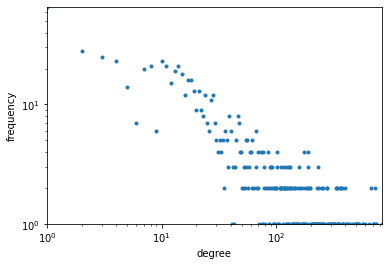

In [158]:
plotDegFrequency(SNet)

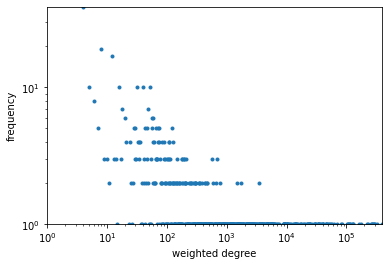

In [159]:
plotDegFrequency(SNet, weighted = True)

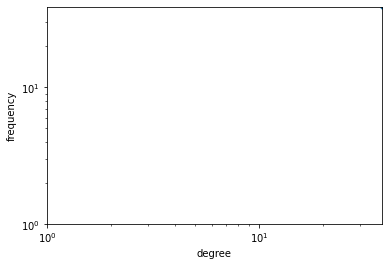

In [160]:
plotDegFrequency(SNetT)

C:\Users\rzlat\AppData\Local\Temp\ipykernel_9312\1800936658.py:22: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(1, max(y))


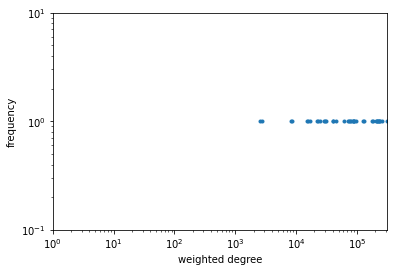

In [161]:
plotDegFrequency(SNetT, weighted = True)

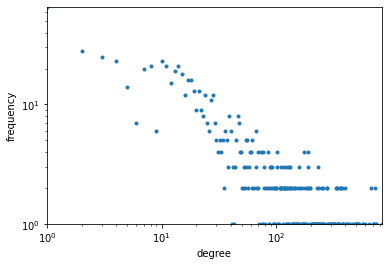

In [162]:
plotDegFrequency(SNetClean)

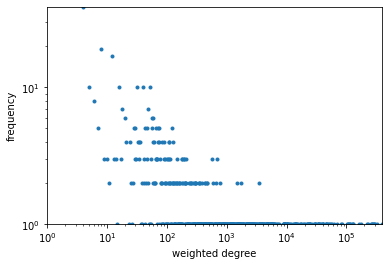

In [163]:
plotDegFrequency(SNetClean, weighted = True)

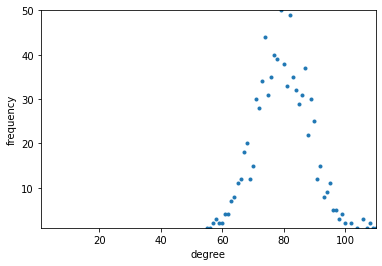

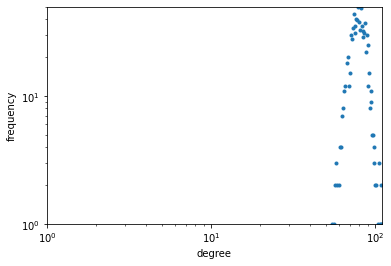

In [164]:
# Random network with size of SNet
n = SNet.number_of_nodes()
m = SNet.number_of_edges()

Gnm = nx.gnm_random_graph(n, m)

plotDegFrequency(Gnm, xscale = "linear", yscale = "linear")
plotDegFrequency(Gnm, xscale = "log", yscale = "log")

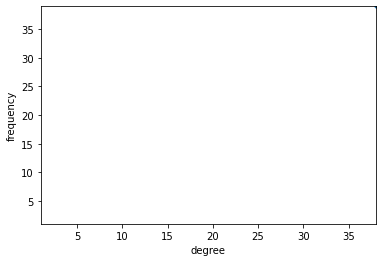

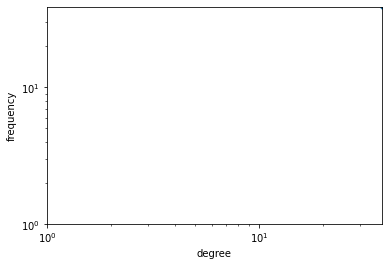

In [165]:
# Random network with size of SNetT
n = SNetT.number_of_nodes()
m = SNetT.number_of_edges()

Gnm = nx.gnm_random_graph(n, m)

plotDegFrequency(Gnm, xscale = "linear", yscale = "linear")
plotDegFrequency(Gnm, xscale = "log", yscale = "log")

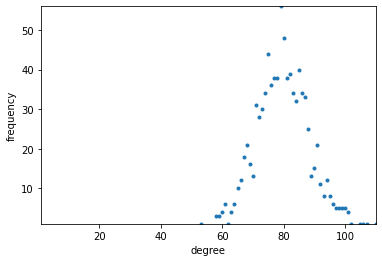

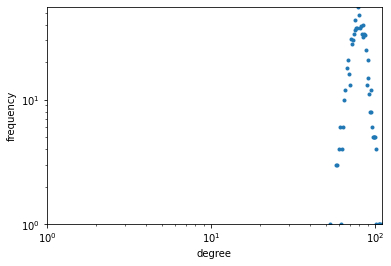

In [166]:
# Random network with size of SNetClean
n = SNetClean.number_of_nodes()
m = SNetClean.number_of_edges()

Gnm = nx.gnm_random_graph(n, m)

plotDegFrequency(Gnm, xscale = "linear", yscale = "linear")
plotDegFrequency(Gnm, xscale = "log", yscale = "log")

Max number of edges: 0.0887325932550644
Difference in number of nodes is 8, which is change of 0.022335762347488623%


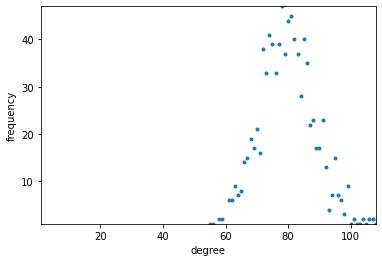

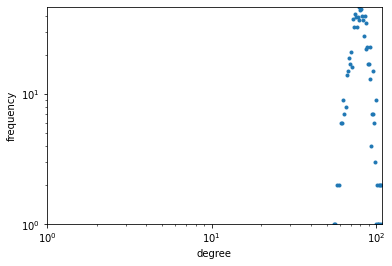

In [167]:
# Erdos-Renyi network for SNet
n = SNet.number_of_nodes()
m = SNet.number_of_edges()
p = (2 * float(m)) / (n * (n - 1))
print("Max number of edges: " + str(p))

ER = nx.erdos_renyi_graph(n, p)

deltaM = m - ER.number_of_edges()
print(f"Difference in number of nodes is {deltaM}, which is change of {abs(float(deltaM)) * 100 / m}%")

plotDegFrequency(ER, xscale = "linear", yscale = "linear")
plotDegFrequency(ER, xscale = "log", yscale = "log")

Max number of edges: 1.0
Difference in number of nodes is 0, which is change of 0.0%


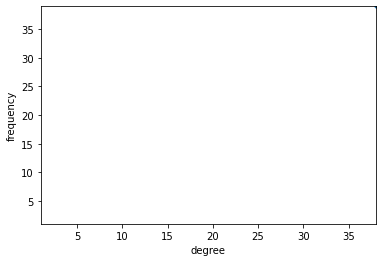

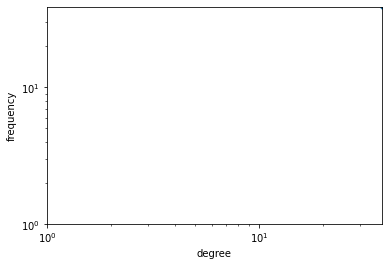

In [168]:
# Erdos-Renyi network for SNetT
n = SNetT.number_of_nodes()
m = SNetT.number_of_edges()
p = (2 * float(m)) / (n * (n - 1))
print("Max number of edges: " + str(p))

ER = nx.erdos_renyi_graph(n, p)

deltaM = m - ER.number_of_edges()
print(f"Difference in number of nodes is {deltaM}, which is change of {abs(float(deltaM)) * 100 / m}%")

plotDegFrequency(ER, xscale = "linear", yscale = "linear")
plotDegFrequency(ER, xscale = "log", yscale = "log")

Max number of edges: 0.0887325932550644
Difference in number of nodes is 28, which is change of 0.07817516821621018%


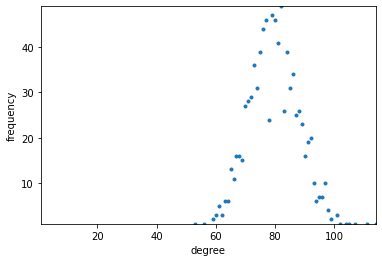

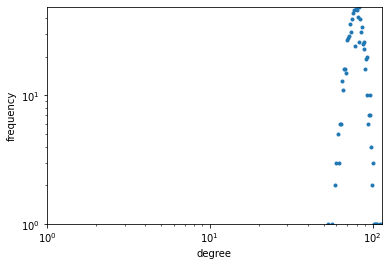

In [169]:
# Erdos-Renyi network for SNetClean
n = SNetClean.number_of_nodes()
m = SNetClean.number_of_edges()
p = (2 * float(m)) / (n * (n - 1))
print("Max number of edges: " + str(p))

ER = nx.erdos_renyi_graph(n, p)

deltaM = m - ER.number_of_edges()
print(f"Difference in number of nodes is {deltaM}, which is change of {abs(float(deltaM)) * 100 / m}%")

plotDegFrequency(ER, xscale = "linear", yscale = "linear")
plotDegFrequency(ER, xscale = "log", yscale = "log")

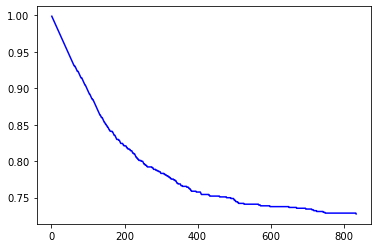

Calculating best minimal value for power law fit
3.7753962436316573
309.0
0.3613258144986748
Loglikelihood ratio: -2.3395251901702485
Exponential better than power law
Statistical significance: 0.10338597721221364
Loglikelihood ratio: -2.181778122686975
Truncated PL better than power law
Statistical significance: 0.036715582901760024


Assuming nested distributions


In [170]:
# Power Law for SNet
degreeSequence = sorted([d for n, d in SNet.degree()], reverse = True)
degreeCount = Counter(degreeSequence)
deg, cnt = zip(*degreeCount.items())

maxDeg = max(deg)

values, base = np.histogram(deg, bins = maxDeg)

cumulative = np.cumsum(values)

plt.plot(base[:-1], [float(x) / len(SNet.nodes()) for x in len(SNet.nodes()) - cumulative], c = "blue")

plt.show()

results = pl.Fit(degreeSequence)

#print(results.supported_distributions)

print(results.power_law.alpha)
print(results.power_law.xmin)
print(results.power_law.sigma)
R, p = results.distribution_compare("power_law", "exponential")
print(f"Loglikelihood ratio: {R}")
print("Exponential better than power law" if R < 0 else "Power law better than exponential")
print(f"Statistical significance: {p}")
R, p = results.distribution_compare("power_law", "truncated_power_law")
print(f"Loglikelihood ratio: {R}")
print("Truncated PL better than power law" if R < 0 else "Power law better than truncated PL")
print(f"Statistical significance: {p}")

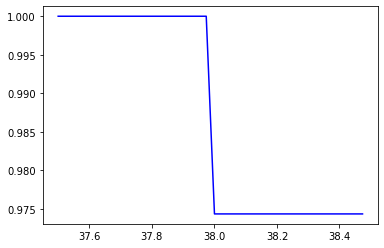

Calculating best minimal value for power law fit
nan
nan
nan
Loglikelihood ratio: 0
Power law better than exponential
Statistical significance: 1
Loglikelihood ratio: 0
Power law better than truncated PL
Statistical significance: 1


Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
D:\Anaconda\lib\site-packages\powerlaw.py:1151: RuntimeWarning: invalid value encountered in double_scalars
  self.alpha = 1 + (self.n / sum(log(data/self.xmin)))
D:\Anaconda\lib\site-packages\powerlaw.py:1170: RuntimeWarning: invalid value encountered in double_scalars
  return 1 + len(data)/sum(log(data / (self.xmin)))
Not enough data. Returning nan
Not enough data. Returning nan
C:\Users\rzlat\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\rzlat\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
No valid fits found.
Not enough data. Returning nan
Assuming nested distributions
D:\Anaconda\lib\site-packages\powerlaw.py:1383: RuntimeWarning: invalid v

In [171]:
# Power Law for SNetT
degreeSequence = sorted([d for n, d in SNetT.degree()], reverse = True)
degreeCount = Counter(degreeSequence)
deg, cnt = zip(*degreeCount.items())

maxDeg = max(deg)

values, base = np.histogram(deg, bins = maxDeg)

cumulative = np.cumsum(values)

plt.plot(base[:-1], [float(x) / len(SNetT.nodes()) for x in len(SNetT.nodes()) - cumulative], c = "blue")

plt.show()

results = pl.Fit(degreeSequence)

#print(results.supported_distributions)

print(results.power_law.alpha)
print(results.power_law.xmin)
print(results.power_law.sigma)
R, p = results.distribution_compare("power_law", "exponential")
print(f"Loglikelihood ratio: {R}")
print("Exponential better than power law" if R < 0 else "Power law better than exponential")
print(f"Statistical significance: {p}")
R, p = results.distribution_compare("power_law", "truncated_power_law")
print(f"Loglikelihood ratio: {R}")
print("Truncated PL better than power law" if R < 0 else "Power law better than truncated PL")
print(f"Statistical significance: {p}")

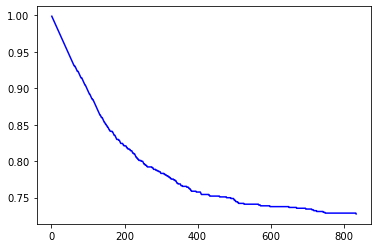

Calculating best minimal value for power law fit
3.7753962436316573
309.0
0.3613258144986748
Loglikelihood ratio: -2.3395251901702485
Exponential better than power law
Statistical significance: 0.10338597721221364
Loglikelihood ratio: -2.181778122686975
Truncated PL better than power law
Statistical significance: 0.036715582901760024


Assuming nested distributions


In [172]:
# Power Law for SNetClean
degreeSequence = sorted([d for n, d in SNetClean.degree()], reverse = True)
degreeCount = Counter(degreeSequence)
deg, cnt = zip(*degreeCount.items())

maxDeg = max(deg)

values, base = np.histogram(deg, bins = maxDeg)

cumulative = np.cumsum(values)

plt.plot(base[:-1], [float(x) / len(SNetClean.nodes()) for x in len(SNetClean.nodes()) - cumulative], c = "blue")

plt.show()

results = pl.Fit(degreeSequence)

#print(results.supported_distributions)

print(results.power_law.alpha)
print(results.power_law.xmin)
print(results.power_law.sigma)
R, p = results.distribution_compare("power_law", "exponential")
print(f"Loglikelihood ratio: {R}")
print("Exponential better than power law" if R < 0 else "Power law better than exponential")
print(f"Statistical significance: {p}")
R, p = results.distribution_compare("power_law", "truncated_power_law")
print(f"Loglikelihood ratio: {R}")
print("Truncated PL better than power law" if R < 0 else "Power law better than truncated PL")
print(f"Statistical significance: {p}")

In [173]:
# Assortativity for SNet
r1 = nx.degree_assortativity_coefficient(SNet)
r2 = nx.degree_assortativity_coefficient(SNet, weight = "weight")

print(r1)
print(r2)
print("Non-similar" if r1 < 0 else "Similar")

-0.5865914891631978
-0.007596196763209406
Non-similar


In [174]:
# Assortativity for SNetT
r1 = nx.degree_assortativity_coefficient(SNetT)
r2 = nx.degree_assortativity_coefficient(SNetT, weight = "weight")

print(r1)
print(r2)
print("Non-similar" if r1 < 0 else "Similar")

nan
0.00010159530135191904
Similar


C:\Users\rzlat\AppData\Roaming\Python\Python39\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


In [175]:
# Assortativity for SNetT
r1 = nx.degree_assortativity_coefficient(SNetClean)
r2 = nx.degree_assortativity_coefficient(SNetClean, weight = "weight")

print(r1)
print(r2)
print("Non-similar" if r1 < 0 else "Similar")

-0.5865914891631978
-0.007596196763209406
Non-similar


In [176]:
# Clustering coefficient for SNet
subreddit, clusteringCoef = zip(*nx.clustering(SNet, weight = "weight").items())

nonzero = [(sub, cc) for sub, cc in zip(subreddit, clusteringCoef) if cc > 0]

df = pd.DataFrame(nonzero, columns = ["id", "cc"])
df.sort_values("cc", inplace = True)

maxLocalClusteringCoef = max(clusteringCoef)
avgClusteringCoef = nx.average_clustering(SNet)

print(f"Max local cc: {maxLocalClusteringCoef}")
print(f"Average cc: {avgClusteringCoef}")
print("Local clustering coefficients that are nonzero: ")
print(df)

Max local cc: 0.003324369581063895
Average cc: 0.8449317408549895
Local clustering coefficients that are nonzero: 
               id        cc
88         arabic  0.000038
636         Infos  0.000089
676    ChileRemix  0.000150
217      dior_lei  0.000184
48   Kaede_Rukawa  0.000218
..            ...       ...
376    geospatial  0.002687
283         hacks  0.002783
668  philadelphia  0.003035
478            sv  0.003125
82     formulaone  0.003324

[831 rows x 2 columns]


In [177]:
# Clustering coefficient for SNetT
subreddit, clusteringCoef = zip(*nx.clustering(SNetT, weight = "weight").items())

nonzero = [(sub, cc) for sub, cc in zip(subreddit, clusteringCoef) if cc > 0]

df = pd.DataFrame(nonzero, columns = ["id", "cc"])
df.sort_values("cc", inplace = True)

maxLocalClusteringCoef = max(clusteringCoef)
avgClusteringCoef = nx.average_clustering(SNet)

print(f"Max local cc: {maxLocalClusteringCoef}")
print(f"Average cc: {avgClusteringCoef}")
print("Local clustering coefficients that are nonzero: ")
print(df)

Max local cc: 0.14465726073078275
Average cc: 0.8449317408549895
Local clustering coefficients that are nonzero: 
               id        cc
32           joel  0.006683
38          ideas  0.006698
34           guns  0.014702
36       software  0.014724
35    photography  0.021563
26         canada  0.021892
37        history  0.023549
11         netsec  0.027870
27           math  0.028541
12     philosophy  0.030092
31         cogsci  0.032778
33         Health  0.034204
29          scifi  0.034427
23           news  0.040697
17          linux  0.041054
30         bestof  0.044059
6           obama  0.052194
18           geek  0.059540
24    environment  0.060554
21        gadgets  0.061357
13         videos  0.062750
22           nsfw  0.065021
28      Economics  0.065415
20         comics  0.068128
10      AskReddit  0.068848
25        atheism  0.071358
19         gaming  0.083993
14        offbeat  0.086100
4        business  0.102201
3     programming  0.103866
16  entertainment 

In [178]:
# Clustering coefficient for SNetClean
subreddit, clusteringCoef = zip(*nx.clustering(SNetClean, weight = "weight").items())

nonzero = [(sub, cc) for sub, cc in zip(subreddit, clusteringCoef) if cc > 0]

df = pd.DataFrame(nonzero, columns = ["id", "cc"])
df.sort_values("cc", inplace = True)

maxLocalClusteringCoef = max(clusteringCoef)
avgClusteringCoef = nx.average_clustering(SNet)

print(f"Max local cc: {maxLocalClusteringCoef}")
print(f"Average cc: {avgClusteringCoef}")
print("Local clustering coefficients that are nonzero: ")
print(df)

Max local cc: 0.003324369581063895
Average cc: 0.8449317408549895
Local clustering coefficients that are nonzero: 
               id        cc
88         arabic  0.000038
636         Infos  0.000089
676    ChileRemix  0.000150
217      dior_lei  0.000184
48   Kaede_Rukawa  0.000218
..            ...       ...
376    geospatial  0.002687
283         hacks  0.002783
668  philadelphia  0.003035
478            sv  0.003125
82     formulaone  0.003324

[831 rows x 2 columns]


In [192]:
componentSizeList = [len(c) for c in sorted(nx.connected_components(SNet), key=len, reverse=True)]
print("\nSNet:")
print(componentSizeList)
componentSizeList = [len(c) for c in sorted(nx.connected_components(SNetT), key=len, reverse=True)]
print("\nSNetT:")
print(componentSizeList)
componentSizeList = [len(c) for c in sorted(nx.connected_components(SNetClean), key=len, reverse=True)]
print("\nSNetClean:")
print(componentSizeList)


SNet:
[897, 2]

SNetT:
[39]

SNetClean:
[897, 2]


In [180]:
# Katz centrality for SNet
lambdaMax = max(nx.adjacency_spectrum(SNet))
print(1 / lambdaMax)

katzC = nx.katz_centrality(SNet, alpha = 1 / lambdaMax, beta = 1.0, max_iter=1000, tol=1, nstart=None, normalized=True, weight='weight')
katzDF = pd.DataFrame.from_dict(katzC, orient = "index", columns=['KC'])
print(katzDF.head(10))

C:\Users\rzlat\AppData\Roaming\Python\Python39\site-packages\networkx\linalg\spectrum.py:110: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return sp.linalg.eigvals(nx.adjacency_matrix(G, weight=weight).todense())


(5.451949452177373e-06+0j)
                            KC
lyrics      0.031461+0.000000j
ITnews      0.031485+0.000000j
pakistan    0.031474+0.000000j
freemusic   0.031664+0.000000j
skeptic     0.031692+0.000000j
government  0.033677+0.000000j
furry       0.031609+0.000000j
meta        0.031704+0.000000j
vim         0.031473+0.000000j
askcheez    0.031524+0.000000j


C:\Users\rzlat\AppData\Roaming\Python\Python39\site-packages\networkx\algorithms\centrality\katz.py:184: ComplexWarning: Casting complex values to real discards the imaginary part
  s = 1.0 / math.hypot(*x.values())


In [181]:
# Katz centrality for SNetT
lambdaMax = max(nx.adjacency_spectrum(SNetT))
print(1 / lambdaMax)

katzC = nx.katz_centrality(SNetT, alpha = 1 / lambdaMax, beta = 1.0, max_iter=1000, tol=1, nstart=None, normalized=True, weight='weight')
katzDF = pd.DataFrame.from_dict(katzC, orient = "index", columns=['KC'])
print(katzDF)

(5.566358978068013e-06+0j)
                               KC
reddit.com     0.271691+0.000000j
pics           0.230778+0.000000j
worldnews      0.214988+0.000000j
programming    0.197501+0.000000j
business       0.195631+0.000000j
politics       0.239206+0.000000j
obama          0.130919+0.000000j
science        0.222593+0.000000j
technology     0.217789+0.000000j
WTF            0.215078+0.000000j
AskReddit      0.147381+0.000000j
netsec         0.110260+0.000000j
philosophy     0.111641+0.000000j
videos         0.141139+0.000000j
offbeat        0.169450+0.000000j
funny          0.224869+0.000000j
entertainment  0.209341+0.000000j
linux          0.120356+0.000000j
geek           0.137347+0.000000j
gaming         0.167622+0.000000j
comics         0.147344+0.000000j
gadgets        0.139565+0.000000j
nsfw           0.144378+0.000000j
news           0.119765+0.000000j
environment    0.138771+0.000000j
atheism        0.151549+0.000000j
canada         0.106524+0.000000j
math           0.1106

C:\Users\rzlat\AppData\Roaming\Python\Python39\site-packages\networkx\linalg\spectrum.py:110: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return sp.linalg.eigvals(nx.adjacency_matrix(G, weight=weight).todense())
C:\Users\rzlat\AppData\Roaming\Python\Python39\site-packages\networkx\algorithms\centrality\katz.py:184: ComplexWarning: Casting complex values to real discards the imaginary part
  s = 1.0 / math.hypot(*x.values())


In [182]:
# Katz centrality for SNetClean
lambdaMax = max(nx.adjacency_spectrum(SNetClean))
print(1 / lambdaMax)

katzC = nx.katz_centrality(SNetClean, alpha = 1 / lambdaMax, beta = 1.0, max_iter=1000, tol=1, nstart=None, normalized=True, weight='weight')
katzDF = pd.DataFrame.from_dict(katzC, orient = "index", columns=['KC'])
print(katzDF.head(10))

C:\Users\rzlat\AppData\Roaming\Python\Python39\site-packages\networkx\linalg\spectrum.py:110: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return sp.linalg.eigvals(nx.adjacency_matrix(G, weight=weight).todense())


(5.451949452177373e-06+0j)
                            KC
lyrics      0.031461+0.000000j
ITnews      0.031485+0.000000j
pakistan    0.031474+0.000000j
freemusic   0.031664+0.000000j
skeptic     0.031692+0.000000j
government  0.033677+0.000000j
furry       0.031609+0.000000j
meta        0.031704+0.000000j
vim         0.031473+0.000000j
askcheez    0.031524+0.000000j


C:\Users\rzlat\AppData\Roaming\Python\Python39\site-packages\networkx\algorithms\centrality\katz.py:184: ComplexWarning: Casting complex values to real discards the imaginary part
  s = 1.0 / math.hypot(*x.values())


In [183]:
# Transitivity for SNet
print(nx.transitivity(SNet))

0.4168800307939218


In [184]:
# Transitivity for SNetT
print(nx.transitivity(SNetT))

1.0


In [185]:
# Transitivity for SNetClean
print(nx.transitivity(SNetClean))

0.4168800307939218


In [186]:
# Louvain communities for SNet
maxMod = -100
maxRes = 0

for i in np.linspace(0.1, 2, 100):
    coms = com.louvain_communities(SNet, weight='weight', resolution=i, threshold=1e-07)
    mod = com.modularity(SNet, coms)
    if mod > maxMod:
        maxMod = mod
        maxRes = i
    del coms

print(maxRes)
print(maxMod)
print()
print(com.modularity(SNet, com.louvain_communities(SNet, 
                                                   weight='weight', 
                                                   resolution=1, 
                                                   threshold=1e-07)))
print()
print(com.modularity(SNet, com.louvain_communities(SNet, 
                                                   weight='weight', 
                                                   resolution=0.5, 
                                                   threshold=1e-07)))
print()
print(com.modularity(SNet, com.louvain_communities(SNet, 
                                                   weight='weight', 
                                                   resolution=1.2, 
                                                   threshold=1e-07)))

1.002020202020202
0.09469573279875099

0.0946957472278433

0.00013449492586383986

0.07905750000020792


In [187]:
# Louvain communities for SNetT
#maxMod = -100
#maxRes = 0

#for i in np.linspace(0.1, 2, 100):
#    coms = com.louvain_communities(SNetT, weight='weight', resolution=i, threshold=1e-07)
#    mod = com.modularity(SNetT, coms)
#    if mod > maxMod:
#        maxMod = mod
#        maxRes = i
#    del coms

#print(maxRes)
#print(maxMod)
#print()
#print(com.modularity(SNet, com.louvain_communities(SNetT, 
#                                                   weight='weight', 
#                                                   resolution=1, 
#                                                   threshold=1e-07)))
#print()
#print(com.modularity(SNet, com.louvain_communities(SNetT, 
#                                                   weight='weight', 
#                                                   resolution=0.5, 
#                                                   threshold=1e-07)))
#print()
#print(com.modularity(SNet, com.louvain_communities(SNetT, 
#                                                   weight='weight', 
#                                                   resolution=1.2, 
#                                                   threshold=1e-07)))

In [188]:
# Louvain communities for SNetClean
maxMod = -100
maxRes = 0

for i in np.linspace(0.1, 2, 100):
    coms = com.louvain_communities(SNetClean, weight='weight', resolution=i, threshold=1e-07)
    mod = com.modularity(SNetClean, coms)
    if mod > maxMod:
        maxMod = mod
        maxRes = i
    del coms

print(maxRes)
print(maxMod)
print()
print(com.modularity(SNet, com.louvain_communities(SNetClean, 
                                                   weight='weight', 
                                                   resolution=1, 
                                                   threshold=1e-07)))
print()
print(com.modularity(SNet, com.louvain_communities(SNetClean, 
                                                   weight='weight', 
                                                   resolution=0.5, 
                                                   threshold=1e-07)))
print()
print(com.modularity(SNet, com.louvain_communities(SNetClean, 
                                                   weight='weight', 
                                                   resolution=1.2, 
                                                   threshold=1e-07)))

0.9828282828282827
0.09469587179738041

0.0946957472278433

0.0001401693774824207

0.079362321163775
